## Исследование рынка недвижимости Санкт-Петербурга и области

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Стоит также описать те данные, с которыми мы работали. 

</div>

## Изучение данных из файла

Откроем файл и посмотрим основную информацию по датафрейму.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Перезапуск позволяет обнаружить и исправить скрытые в коде ошибки. 

</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В датафрейме всего 23699 строк с данными по 22 категориям. Из них 3 категориальных, 2 логические, 17 числовых. Радует, что столбцов без нулевых объектов довольно много. Ознакомимся с примерами данных.

In [ ]:
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Отметим, что некоторые виды данных не соответствуют содержанию. Число этажей или балконов не может быть дробным, поэтому можно изменить тип данных этих столбцов на целочисленный. К int лучше также привести количество парков и прудов поблизости и число дней размещения объявления. Столбец с обозначением апартаментов лучше исправить на логический (bool), а дату первого размещения - на временной. 

In [ ]:
print('Количество пропусков по столбцам:\n', data.isna().sum())

Количество пропусков по столбцам:
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


В столбцах с количеством фото, ценой, общей площадью, датой первого размещения, числом комнат, этажом, а также отметками студий и открытых планировок заполнены все данные. Что ж, это уже немало, поработаем над пропусками  в следующей теме, а пока изучим уникальные значения и описание данных.

In [ ]:
print('Количество уникальных значений по столбцам:\n', data.nunique())

Количество уникальных значений по столбцам:
 total_images              38
last_price              2978
total_area              2182
first_day_exposition    1491
rooms                     17
ceiling_height           183
floors_total              36
living_area             1782
floor                     33
is_apartment               2
studio                     2
open_plan                  2
kitchen_area             971
balcony                    6
locality_name            364
airports_nearest        8275
cityCenters_nearest     7642
parks_around3000           4
parks_nearest            995
ponds_around3000           4
ponds_nearest           1096
days_exposition         1141
dtype: int64


In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Отметим, что есть объявления без фотографий, а также аномалии - нулевые значения в числе комнат, высота потолка 100 м, на которые нужно обратить внимание в следующем пункте. 

### Вывод

Датафрейм необходимо предварительно обработать - заполнить или изучить природу пропусков, проверить аномалии, по крайней мере в 7 столбцах нужно заменить тип данных.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

</div>

## Предобработка данных

Начнем с изучения данных каждого столбца отдельно. Первые три параметра - количество фото, последняя цена и общая площадь - не имеют пропусков и значимых аномалий. В следующем столбце с датой поменяем тип данных и оставим только день, без часов и минут. 

<B> Дата первой публикации (First day exposition)</B>

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

<B> Число комнат (Rooms) </B>

В этом столбце отмечены аномалии в виде нулевого количества комнат. Вероятно, это случайные пропуски, связанные  с вводом данных. Посчитаем, сколько таких значений, сколько при этом общая площадь квартиры, и небольшие по площади квартиры обработаем, изменив число комнат на 1.

In [ ]:
print('Квартир с 0 комнат:', len(data[data['rooms'] == 0]))

Квартир с 0 комнат: 197


In [ ]:
display(data[data['rooms'] == 0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Таблицы на печать выводи с помощью метода display. print переводит данные в строку, а нам этого не надо. 

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: 👍 

</div>

Даже большие по площади квартиры оказались либо студиями, либо со свободной планировкой, что не мешает нам заменить число комнат на 1. 

In [ ]:
data['rooms'] = data['rooms'].replace(0, 1)

<B> Высота потолка (Ceiling height) </B>

In [ ]:
print('Всего пропусков:', data['ceiling_height'].isna().sum(), '\nЧто составляет {:.1%}'. format(len(data[data['ceiling_height'].isna()]) / (len(data['ceiling_height']))) + ' данных')

Всего пропусков: 9195 
Что составляет 38.8% данных


In [ ]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В этом столбце много пропусков, а также есть аномальные значения. Высота потолка от 23 метров, скорее всего, является погрешностью ввода или переноса данных, поэтому отделим у этих чисел десятичную часть. 
Обычно на высоту потолка влияет этажность дома, поэтому заменим пропуски на медиану высоты потолка в домах с таким же числом этажей. 

In [ ]:
print(data.loc[data['ceiling_height'] >23])

       total_images  last_price  total_area first_day_exposition  rooms  \
355              17   3600000.0        55.2           2018-07-12      2   
3148             14   2900000.0        75.0           2018-11-12      3   
4643              0   4300000.0        45.0           2018-02-01      2   
4876              7   3000000.0        25.0           2017-09-27      1   
5076              0   3850000.0        30.5           2018-10-03      1   
5246              0   2500000.0        54.0           2017-10-13      2   
5669              4   4400000.0        50.0           2017-08-08      2   
5807             17   8150000.0        80.0           2019-01-09      2   
6246              6   3300000.0        44.4           2019-03-25      2   
9379              5   3950000.0        42.0           2017-03-26      3   
10773             8   3800000.0        58.0           2017-10-13      2   
11285             0   1950000.0        37.0           2019-03-20      1   
14382             9   170

In [ ]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x * 0.1 if x > 23 else x)

In [ ]:
floors_group = data.groupby(['floors_total'])
data['ceiling_height'] = floors_group.ceiling_height.apply(lambda x: x.fillna(x.median()))

In [ ]:
print('Среднее значение столбца с высотой потолка равно', data['ceiling_height'].mean())
print('Медианное значение столбца с высотой потолка равно', data['ceiling_height'].median())

Среднее значение столбца с высотой потолка равно 2.7112938336439094
Медианное значение столбца с высотой потолка равно 2.65


In [ ]:
data['ceiling_height'].isna().sum() == data['floors_total'].isna().sum()

False

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Заполнение такого числа пропусков в высоте потолков может исказить структуру данного столбца. Слишком много пропусков у нас в данном параметре. Подумай, на основании какого параметра лучше будет обработать данный столбец. Строительство, в основном, типовое, поэтому одинаковые дома обладают схожими характеристиками. Однако ввиду малой дисперсии в данном параметре, мы можем использовать такой способ обработки пропусков. 

</div>

<B> Всего этажей (Floors total) </B>

In [ ]:
print('Всего пропусков:', data['floors_total'].isna().sum(), '\nЧто составляет {:.1%}'. format(len(data[data['floors_total'].isna()]) / (len(data))) + ' данных')

Всего пропусков: 86 
Что составляет 0.4% данных


In [ ]:
data['floors_total'] = pd.to_numeric(data['floors_total'], downcast='integer')

In [ ]:
print(data[data['floors_total'].isna()])

       total_images  last_price  total_area first_day_exposition  rooms  \
186              12  11640000.0        65.2           2018-10-02      2   
237               4   2438033.0        28.1           2016-11-23      1   
457               4   9788348.0        70.8           2015-08-01      2   
671               4   6051191.0        93.6           2017-04-06      3   
1757              5   3600000.0        39.0           2017-04-22      1   
...             ...         ...         ...                  ...    ...   
22542             5   8500000.0        63.5           2017-05-24      2   
22656             4   4574160.0        64.5           2017-04-02      2   
22808             0  14569263.0       110.4           2016-11-20      3   
23590             0  21187872.0       123.3           2017-04-25      3   
23658             6   3063600.0        43.8           2016-11-28      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
186              2.

Пропусков не так много, а их заполнение средними значениями может повлиять на статистику исследования, поэтому просто удалим их.

In [ ]:
data.dropna(subset=['floors_total'], inplace=True)

<B> Апартаменты (Is apartment) </B>

В этом столбце много пропусков, скорее всего, авторы объявлений просто не вводили информацию, если объект не является апартаментами. Поэтому заполним пропуски отрицанием и заменим тип данных на логический

In [ ]:
print('Пропусков информации по апартаментам:', data['is_apartment'].isna().sum(), ', это составляет', (data['is_apartment'].isna().sum()) / len(data['is_apartment']), 'всех данных.')

Пропусков информации по апартаментам: 20838 , это составляет 0.8824799898361072 всех данных.


In [ ]:
data['is_apartment'].value_counts(dropna = False)

NaN      20838
False     2725
True        50
Name: is_apartment, dtype: int64

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [ ]:
def bool_func(x):
    return x == True
data['is_apartment'] = data['is_apartment'].apply(bool_func)

In [ ]:
data['is_apartment'].value_counts(dropna = False)

False    23563
True        50
Name: is_apartment, dtype: int64

В столбцах с номером этажа, обозначением студии или свободной планировки нет пропусков, данные в порядке.

In [ ]:
data['floor'].describe()

count    23613.000000
mean         5.877313
std          4.873539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [ ]:
data['studio'].describe()

count     23613
unique        2
top       False
freq      23467
Name: studio, dtype: object

In [ ]:
data['open_plan'].describe()

count     23613
unique        2
top       False
freq      23546
Name: open_plan, dtype: object

<B> Жилая площадь (Living area) </B>

<B> Площадь кухни (Kitchen area) </B>

In [ ]:
print('Всего пропусков:', data['living_area'].isna().sum(), '\nЧто составляет {:.1%}'. format(len(data[data['living_area'].isna()]) / (len(data))) + ' данных')

Всего пропусков: 1870 
Что составляет 7.9% данных


In [ ]:
print('Всего пропусков:', data['kitchen_area'].isna().sum(), '\nЧто составляет {:.1%}'. format(len(data[data['kitchen_area'].isna()]) / (len(data))) + ' данных')

Всего пропусков: 2231 
Что составляет 9.4% данных


Пропуски составляют большую часть данных, скорее всего, авторы объявлений просто не вписали жилую и площадь кухни из-за незнания или лени. Можно вычислить примерные значения, применив медианные отношения к общей площади, а заодно добавить требуемые столбцы. 

(0, 900)

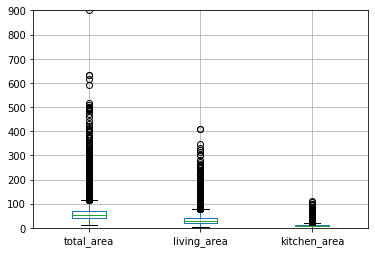

In [ ]:
data_area = data[['total_area', 'living_area', 'kitchen_area']].copy()
data_area.boxplot()
plt.ylim(0, 900)

In [ ]:
living_to_total_mean = (data['living_area'] / data['total_area']).mean()
kitchen_to_total_mean = (data['kitchen_area'] / data['total_area']).mean()

In [ ]:
data['living_area'] = data['living_area'].fillna(living_to_total_mean * data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_to_total_mean * data['total_area'])

print('Пропущенных значений жилой площади осталось:', data['living_area'].isna().sum(), '\nПропущенных значений площади кухни осталось:', data['kitchen_area'].isna().sum())

Пропущенных значений жилой площади осталось: 0 
Пропущенных значений площади кухни осталось: 0


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Пропуски в площадях ты обработала правильно. Конечно, данные параметры сильно зависят от общей площади квартиры. Стоит подтвердить выбор такого способа обработки пропусков при помощи вывода корреляций между данными параметрами. 

</div>

<B> Балкон (Balcony) </B>

In [ ]:
print('Пропусков информации по балконам:', data['balcony'].isna().sum(), ', это составляет', (data['balcony'].isna().sum()) / len(data['balcony']), 'всех данных.')

Пропусков информации по балконам: 11480 , это составляет 0.48617287087621225 всех данных.


In [ ]:
data['balcony'].value_counts(dropna = False)

NaN    11480
1.0     4195
0.0     3713
2.0     3657
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

В столбце с данными о балконах пропусков почти половина, удалять эти строки нельзя. Скорее всего, информацию не стали вводить, так как балконов действительно нет. Поэтому логично заменить пропуски нулями. 
Тип данных заменим на целочисленный.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts()

0.0    15193
1.0     4195
2.0     3657
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [ ]:
data['balcony'] = data['balcony'].astype('int')

<B> Название населенного пункта (Locality name) </B>

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
len(data['locality_name'].unique())

365

Названий населенных пунктов много, но некоторые из них повторяются из-за разного написания (например, "поселок Мурино" и "посёлок Мурино"), где-то тип населенного пункта указан, а где-то - нет. Упростим список, оставив только названия.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Импорт необходимых библиотек следует производить в первой ячейке работы, как то рекомендует стандарт. 

</div>

In [ ]:
data['locality_name'] = data['locality_name'].str.replace(r"\b([а-я])(\w+)\b","").replace(r'\s*([^\s]+)\s*', r'\1', regex=True)

In [ ]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [ ]:
len(data['locality_name'].unique())

306

Почти 60 уникальных названий оказались не такими уж и уникальными.

In [ ]:
print('Пропусков в столбце с названиями местности:', data['locality_name'].isna().sum())
print('Это составляет', len(data[data['locality_name'].isna()]) / len(data['locality_name']), 'всех значений')

Пропусков в столбце с названиями местности: 48
Это составляет 0.002032778554186253 всех значений


Пропуски в столбце с названиями местности сложно заполнить логически. Их не так много, чтобы влиять на статистику, поэтому проще их удалить.

In [ ]:
data = data.dropna(subset=['locality_name'])
data.reset_index(drop=True, inplace=True)
print('Пропусков в столбце с названиями местности:', data['locality_name'].isna().sum())

Пропусков в столбце с названиями местности: 0


<B> Расстояние до центра (CityCenters nearest) </B>

In [ ]:
print('Пропусков информации с расстоянием до центра:', data['cityCenters_nearest'].isna().sum(), ', это составляет', (data['cityCenters_nearest'].isna().sum()) / len(data['cityCenters_nearest']), 'всех данных.')

Пропусков информации с расстоянием до центра: 5501 , это составляет 0.23343942287290473 всех данных.


Так как для исследования нам больше всего нужны данные по СПб, то посмотрим пропуски именно там.

In [ ]:
len(data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna())]) / len(data.query('locality_name == "Санкт-Петербург"'))

0.003833620854897451

In [ ]:
data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'].isna().sum()

60

Почти все данные по Санкт-Петербургу заполнены, пропуски не повлияют на исследование, поэтому оставим их.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_arou

<B> Расстояние до ближайшего аэропорта (Airports nearest) </B>

Многие данные в графе с расстоянием до аэропорта пропущены, их можно приблизительно восстановить, используя медианные значения расстояний этого населенного пункта. Наибольший разброс в расстоянии был бы по СПб, но там пропусков незначительно мало.

In [ ]:
print('Пропусков информации с расстоянием до аэропорта:', data['airports_nearest'].isna().sum(), ', это составляет', (data['airports_nearest'].isna().sum()) / len(data['airports_nearest']), 'всех данных.')

Пропусков информации с расстоянием до аэропорта: 5524 , это составляет 0.2344154466369616 всех данных.


In [ ]:
print('Пропусков информации с расстоянием до аэропорта:', data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].isna().sum(), ', это составляет', (data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].isna().sum()) / len(data['airports_nearest']), 'всех данных.')

Пропусков информации с расстоянием до аэропорта: 84 , это составляет 0.0035646085295989813 всех данных.


In [ ]:
data.loc[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].isna().sum()

84

In [ ]:
locality_group = data.groupby('locality_name')
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = locality_group['airports_nearest'].fillna(data['airports_nearest'].median())

Пропуски в категориях числа ближайших парков или прудов, наверное, говорят об отсутствии оных. Поэтому заменяем пропуски на нули и меняем тип данных на int. То же самое проделываем с длительностью публикации объявления, тк для расчетов нам будет удобнее работать с целыми числами.

In [ ]:
#data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

In [ ]:
#data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Пропуски в тех параметрах, что мы не используем в анализе, можно оставить. На результатах исследования их наличие никак не скажется. 

</div>

In [ ]:
data['days_exposition'].isna().sum()

3171

In [ ]:
#data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

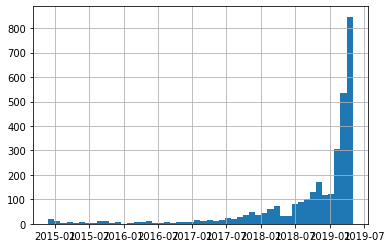

In [ ]:
data[data['days_exposition'].isna()]['first_day_exposition'].hist(bins=50)

Пропуски в длительности размещения увеличивается по мере роста даты, то есть, чем новее объявление, тем больше вероятность пропуска. Скорее всего, это еще существующие объявления, не снятые из базы, потому что квартира еще не продана. Оставим эти пропуски как есть.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>
    
Ошибка: Заполнять мы, строго говоря, имеем право только когда данные пропущены совершенно случайно (MCAR) - тогда заполнение не повлияет на характер связи между заполняемой переменной и остальными. Относятся ли пропуски в данном столбце к данному типу пропусков? Посмотри внимательнее на распределение пропусков в данном столбце во времени, т.е. относительно дня выставления квартиры на продажу. 

</div>

<div class="alert alert-info">
Спасибо, действительно, эти пропуски не случайны, нужно было изучить их внимательнее
    </div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Верный график. С большой долей вероятности такие пропуски не являются случайными. Их лучше оставить без заполнения. 

</div>

Мы не можем логически заменить пропуски со значениями расстояния до центра, пруда или парка, поэтому оставим их в датафрейме, они тоже несут определенное значение.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_arou

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.600000,1,False,False,False,11.00000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.300000,4,False,False,False,8.30000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,89.826726,9,False,False,False,29.78452,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,False,False,9.10000,0,Янино-1,26757.0,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.66,26.0,10.600000,6,False,False,False,14.40000,1,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,40.450274,22,False,False,False,18.90000,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,False,False,8.81000,0,Мурино,26757.0,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,False,False,6.50000,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Пропуски обработаны там, где это возможно. Данные подготовлены к дальнейшему анализу.

</div>

## Расчёты и добавление результатов в таблицу

Добавляем в таблицу данные о цене за кв.м. и для удобства расчетов меняем тип данных на int. 

In [ ]:
data['price_per_sqm'] = data['last_price'] / data['total_area']

In [ ]:
data['price_per_sqm'] = data['price_per_sqm'].astype('int')

Затем создадим функцию для распределения этажей по категориям и применим эту функцию к значениям этажа, запишем в отдельный столбец.

In [ ]:
def floor_categories(row):
    if row[8] == 1:
        return 'первый'
    elif row[8] == row[6]:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(floor_categories,axis=1)
data['floor_category'].value_counts() 

другой       17326
последний     3330
первый        2909
Name: floor_category, dtype: int64

Добавим еще 3 столбца с соотношением общей площади к жилой и кухонной.

In [ ]:
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 26 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_arou

In [ ]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 29 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_arou

In [ ]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,floor_category,living_to_total,kitchen_to_total,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,другой,0.472222,0.231481,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.600000,1,False,False,False,11.00000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,первый,0.460396,0.272277,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.300000,4,False,False,False,8.30000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,другой,0.612500,0.148214,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,89.826726,9,False,False,False,29.78452,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,другой,0.564948,0.187324,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,другой,0.320000,0.410000,1,6,2018


Данные полностью готовы к исследованию - все возможные пропуски заполнены, оставшиеся не будут отрицательно влиять на результаты. Добавлены столбцы с данными о соотношении площадей квартиры, времени размещения, типе этажности и цене за квадратный метр. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Добавление необходимых для дальнейшего исследования параметров произведено. 

</div>

## Исследовательский анализ данных

<B> 1. Изучение параметров: площади, цены, числа комнат, высоты потолков </B>

Площадь

Получим общее представление о площади выставляемых на продажу квартир. Средняя площадь - 60.3 кв.м., что чуть больше медианной в 52 кв.м. Размах вариантов площади - от 12 кв.м. до 900 кв.м., и, судя по всему, они не являются ошибочными, данные правдоподобны. Большинство значений находится в диапазоне от 40 до 70 кв.м. 

In [ ]:
def box_limits(title):
    print(data[title].describe())
    q1 = data[title].quantile(0.25)
    q3 = data[title].quantile(0.75)
    iqr = q3 - q1
    limit_left = q1 - 1.5 * iqr
    if limit_left < data[title].min():
        limit_left = data[title].min()
    limit_right = q3 + 1.5 * iqr
    if limit_right > data[title].max():
        limit_right = data[title].max()
    print(data[title].hist(range=(q1-3*iqr, q3+3*iqr)))
    print('\nСлишком маленькие значения до:', limit_left, '\nСлишком большие значения от:', limit_right)    

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)

Слишком маленькие значения до: 12.0 
Слишком большие значения от: 114.25


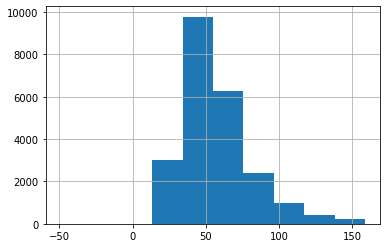

In [ ]:
box_limits('total_area')

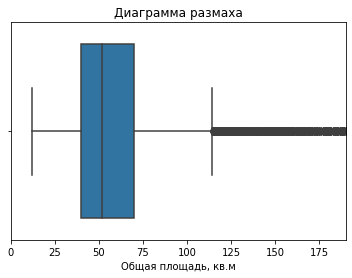

In [ ]:
sns.boxplot(data['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 190)
plt.show()

In [ ]:
data['total_area_bad'] = data['total_area'] > 114.25

Цена

Средняя цена квартиры - 6.5 млн, медианная - 4.6 млн, размах - от 1.21 до 763 млн. Основные значения находятся в диапазоне от 3.7 млн до 7 млн руб.

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)

Слишком маленькие значения до: 12190.0 
Слишком большие значения от: 11875000.0


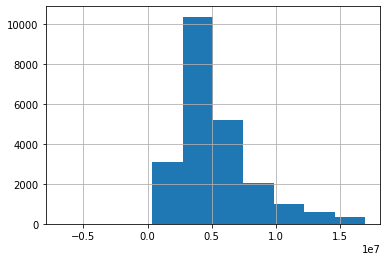

In [ ]:
box_limits('last_price')

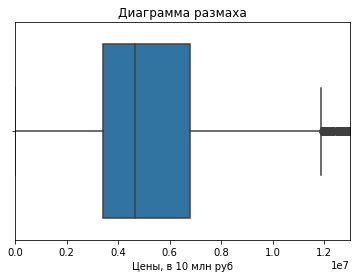

In [ ]:
sns.boxplot(data['last_price'])
plt.title('Диаграмма размаха')
plt.xlabel('Цены, в 10 млн руб')
_ = plt.xlim(0, 13000000)

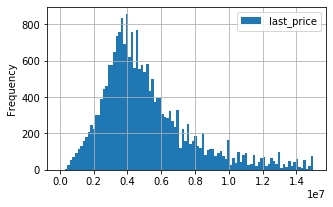

In [ ]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))

Также изучим данные по стоимости квадратного метра. В среднем цена кв.м. - около 100 тыс.руб., больше квартир находится в диапазоне цен 75-90 т.р. за кв.м.

count    2.356500e+04
mean     9.940539e+04
std      5.038944e+04
min      1.110000e+02
25%      7.656600e+04
50%      9.500000e+04
75%      1.142130e+05
max      1.907500e+06
Name: price_per_sqm, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)

Слишком маленькие значения до: 20095.5 
Слишком большие значения от: 170683.5


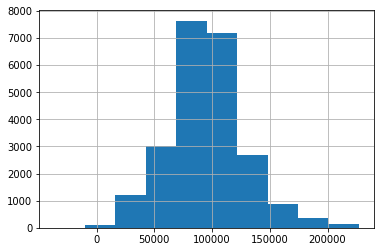

In [ ]:
box_limits('price_per_sqm')

Число комнат

Больше всего объявлений с одно- и двухкомнатными квартирами. Вспомним, что в этой категории мы заменяли нули единицами, что повысило число 1-комнатных квартир, даже если по площади они больше соответствуют многокомнатным помещениям.

count    23565.000000
mean         2.078888
std          1.066503
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)

Слишком маленькие значения до: 1 
Слишком большие значения от: 6.0


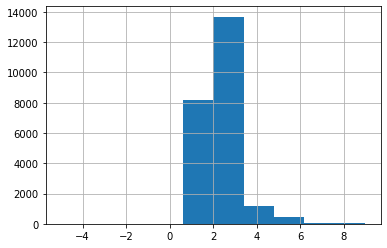

In [ ]:
box_limits('rooms')

In [ ]:
data['rooms'].value_counts()

1     8198
2     7897
3     5779
4     1172
5      325
6      104
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

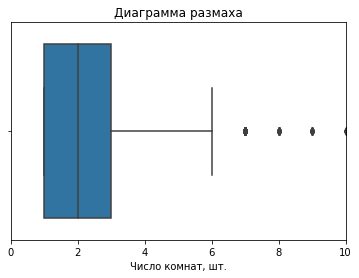

In [ ]:
sns.boxplot(data['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')
_ = plt.xlim(0, 10)

In [ ]:
data['rooms_bad'] = data['rooms'] > 6

Высота потолка

Средняя высота потолка в квартирах - 2.7 м, медианная - 2.65 м. Аномальные значения в 1 м или 22 м явно ошибочны, лучше уточнить их правильность у поставщика датафрейма, но для удобства и точности расчетов мы пока их уберем.

count    23565.000000
mean         2.711065
std          0.316180
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         22.600000
Name: ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)

Слишком маленькие значения до: 2.2499999999999996 
Слишком большие значения от: 3.0500000000000003


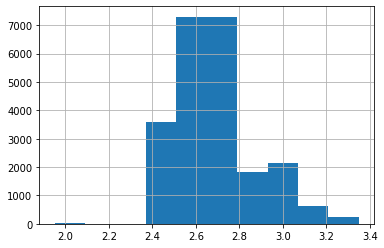

In [ ]:
box_limits('ceiling_height')

In [ ]:
len(data[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2.3)])

71

In [ ]:
data = data.drop(data[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2.3)].index)

In [ ]:
data = data.reset_index(drop=True)

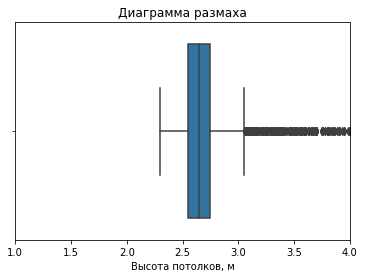

In [ ]:
sns.boxplot(data['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м')
_ = plt.xlim(1, 4)

In [ ]:
data['ceiling_height_bad'] = (data['ceiling_height'] < 2.25) | (data['ceiling_height'] > 3)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: При анализе ты проводишь однотипные действия на каждом шаге. Попробуй автоматизировать процесс построения графиков через цикл или собственную функцию. Интервал построения графиков рассчитывай автоматически. Например, от Q1-3\*IQR до Q3+3\*IQR. 

</div>

<div class="alert alert-info">
Спасибо! С функцией намного удобнее, а написать ее оказалось не так сложно.
    </div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Классная функция! Молодец, что разобралась с ней. 

</div>

<B> Время продажи квартиры </B>

В среднем объявления с квартирами размещаются 180 дней, а медиана составляет 95 дней. Стандартная девиация тоже очень большая, как и размах - от 1 до 1580 дней, хотя большинство объявлений висят от 40 до 240 дней.

count    20335.000000
mean       180.510991
std        219.467578
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)

Слишком маленькие значения до: 1.0 
Слишком большие значения от: 510.0


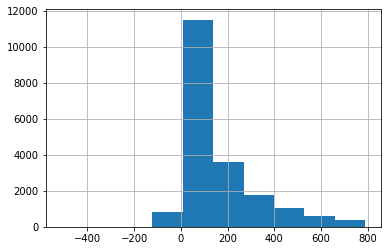

In [ ]:
box_limits('days_exposition')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Не забывай подписывать оси на графиках и делать им названия. Это все же также важные элементы любой визуализации. Как делать подписи и названия, смотри [тут](https://pyprog.pro/mpl/mpl_axis_signatures.html) и [тут](https://pyprog.pro/mpl/mpl_title.html).

</div>

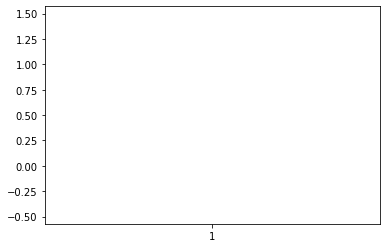

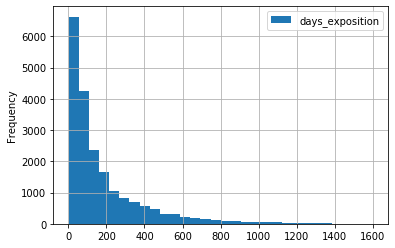

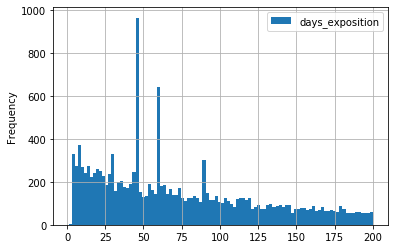

In [ ]:
plt.boxplot(data['days_exposition'])
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

Видны пики в 45, 60, 90 дней. Учитывая "круглые" цифры, похоже, что они созданы автоматически - может, система убирает объявления через 45 дней? Во всяком случае, сложно понять, была ли квартира действительно продана за такой срок, либо объявление было удалено. Сочтем такие значения аномальными и тоже их удалим.

In [ ]:
print('Число квартир, объявления про которые были открыты 45, 60 или 90 дней:', len(data[(data['days_exposition'] == 45) | (data['days_exposition'] == 60) | (data['days_exposition'] == 90)]))

Число квартир, объявления про которые были открыты 45, 60 или 90 дней: 537


In [ ]:
print('Это в процентах от всех объявлений:', (len(data[(data['days_exposition'] == 45) | (data['days_exposition'] == 60) | (data['days_exposition'] == 90)]) / len(data)) *100)

Это в процентах от всех объявлений: 2.2856899633949093


Подозрительно смотрятся и квартиры, проданные меньше чем за 15 дней или продаваемые дольше 450 дней.

Почистим данные, оставив те объявления, по которым, скорее всего, действительно были проданы квартиры, а также убрав данные по найденным выше выбросам.

In [ ]:
filtered_data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 30 and days_exposition != 0 and days_exposition > 15 and days_exposition < 480 and total_area_bad == False and rooms_bad == False and ceiling_height_bad == False').reset_index(drop=True)

In [ ]:
print('Доля отфильтрованных значений составила: {:.1%}'. format(len(filtered_data) / len(data)))

Доля отфильтрованных значений составила: 62.0%


In [ ]:
filtered_data['days_exposition'].describe()

count    14555.000000
mean       138.082996
std        114.133304
min         16.000000
25%         45.000000
50%         98.000000
75%        194.000000
max        479.000000
Name: days_exposition, dtype: float64

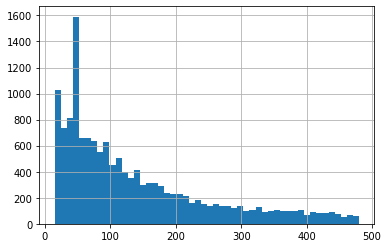

In [ ]:
filtered_data['days_exposition'].hist(bins=50, range=(15, 480))

In [ ]:
filtered_data['days_exposition'].value_counts().head(10)

45.0    866
90.0    144
44.0    134
20.0    132
21.0    120
18.0    118
28.0    118
19.0    117
22.0    116
29.0    112
Name: days_exposition, dtype: int64

Теперь самые популярные значения не подозрительно превышают по частоте остальные, и на графике нет аномальных пиков. Средня продолжительность - 137 дней, медиана - 111. Большинство значений находятся в промежутке до 150-200, затем идет явный спад, все-таки, продать квартиру за 6-9 месяцев - намного реальнее, чем дольше ждать покупателя.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
   
Успех: Здорово, что есть гипотезы о быстрых и долгих сделках.

</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: В данных есть выбросы и в других параметрах. Их следует удалять на основании диаграмм размаха. Построй для всех необходимых параметров график boxplot. По нему найди границы нормальных значения и удали выбросы. 

</div>

<div class="alert alert-info">
Спасибо, еще почистили данные) По всем вышеуказанным параметрам нашла выбросы по диаграммам размаха, насколько я понимаю, все удалила
    </div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Выбросы из данных убраны. Больше они не повлияют на результаты дальнейшего анализа. 

</div>

<B>Факторы, влияющие на стоимость квартиры</B>

Изучим факторы влияния на стоимость квадратного метра

In [ ]:
price_area_rooms_center = filtered_data.loc[:,['price_per_sqm', 'total_area', 'rooms', 'cityCenters_nearest']]
price_area_rooms_center.head()

,price_per_sqm,total_area,rooms,cityCenters_nearest
0,82920,40.40,1,18603.0
1,95065,30.40,1,NaN
2,99195,37.30,1,19143.0
3,87454,33.16,1,NaN
4,88524,61.00,3,15008.0


In [ ]:
price_area_rooms_center.corr()

,price_per_sqm,total_area,rooms,cityCenters_nearest
price_per_sqm,1.000000,0.084941,-0.133665,-0.402995
total_area,0.084941,1.000000,0.793275,-0.141614
rooms,-0.133665,0.793275,1.000000,-0.082519
cityCenters_nearest,-0.402995,-0.141614,-0.082519,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8bc758d0>,
      dtype=object)

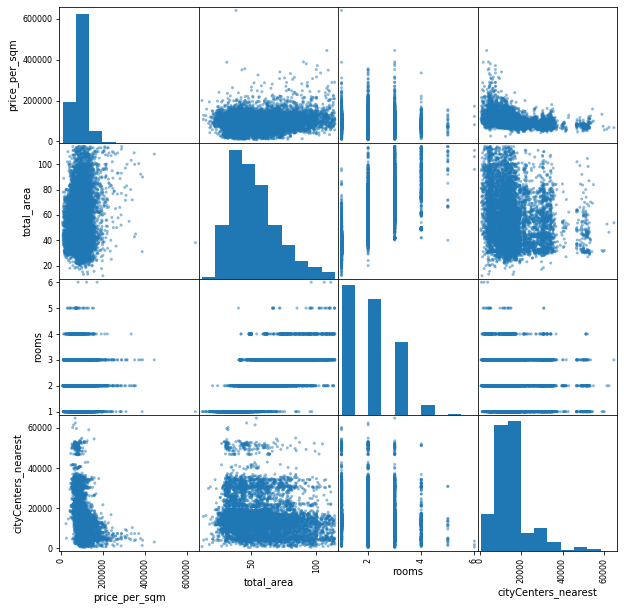

In [ ]:
pd.plotting.scatter_matrix(price_area_rooms_center, figsize=(10, 10))

Корреляция между площадью и ценой за метр слабая, сильнее влияет на стоимость кв.м расположение в центре. Что понятно, чем ближе к центру - тем дороже. Отметим, что основная часть квартир расположена в пределах 20 км от центра. Рассмотрим каждый признак подробнее.

Площадь и стоимость квартиры

In [ ]:
filtered_data['total_area'].corr(filtered_data['price_per_sqm'])

0.08494066255582992

0.08494066255582992

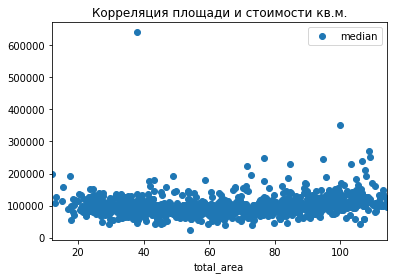

In [ ]:
pivot_table_total_area = filtered_data.pivot_table(index = 'total_area', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', title='Корреляция площади и стоимости кв.м.')

pivot_table_total_area.sort_values('median', ascending = False)

filtered_data['total_area'].corr(filtered_data['price_per_sqm'])

Зависимость крайне низкая, что значит, что при увеличении площади цена за метр растет незначительно, причем, только за счет отдельных значений, основная масса значений остается примерно на одном уровне.

<B> Зависимость стоимости от числа комнат </B>

In [ ]:
pivot_table_rooms = filtered_data.pivot_table(index = 'rooms', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']

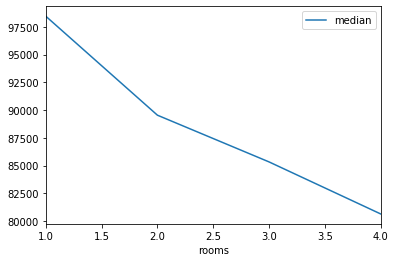

In [ ]:
pivot_table_rooms.query('count > 50').plot(y = 'median')

In [ ]:
pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

,mean,count,median
rooms,,,
1,98031.454783,5739,98461
2,90511.284352,5138,89543
3,87518.555073,3223,85333
4,83782.702128,423,80645


In [ ]:
filtered_data['rooms'].corr(data['price_per_sqm'])

-0.0004891273315345894

По подсчетам видим, что цена за метр ниже всего в 3-комнатных квартирах, что логично, т.к. цена за квадрат "рассеивается" из-за большей площади. Выше всего цена квадрата в однушках. В многокомнатных квартирах стоимость метра опять растет, ведь среди такого жилья больше недвижимости класса "премиум".

<B> Зависимость стоимости от расстояния от центра </B>

In [ ]:
filtered_data['cityCenters_nearest'].corr(filtered_data['price_per_sqm'])

-0.4029948502233

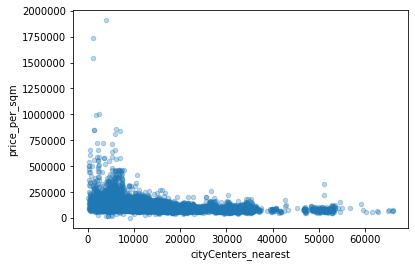

In [ ]:
data.plot(kind = 'scatter', y = 'price_per_sqm', x = 'cityCenters_nearest', alpha = 0.3)

Подтверждаем выводы по общим расчетам - небольшая обратная корреляция говорит о снижении стоимости квадратного метра при удалении объекта от центра.

<B> Зависимость стоимости от этажа </B>

In [ ]:
pivot_table_floor_category = filtered_data.pivot_table(index = 'floor_category', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']

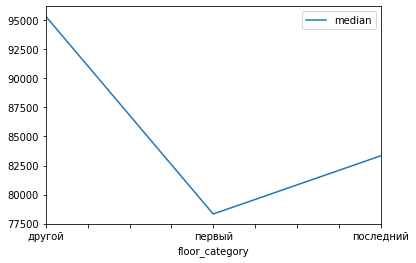

In [ ]:
pivot_table_floor_category.plot(y = 'median')

Стоимость квадрата ниже всего для квартир на первом этаже, у квартир на последнем этаже она чуть повышается, но дороже всего продаются квартиры, расположенные посередине. 

<B> Зависимость стоимости от даты размещения </B>

Зависимость от года

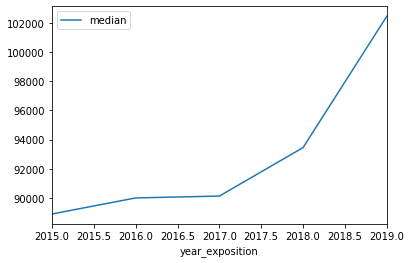

In [ ]:
pivot_table_year_exposition = filtered_data.pivot_table(index = 'year_exposition', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

Ничего нового - с каждым годом стоимость растет, а в 2018 и 2019 скачки вверх еще значительнее.

In [ ]:
pivot_table_year_exposition.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2019,102298.785479,606,102440
2018,93249.149478,5847,93457
2017,91405.594162,5995,90140
2016,91984.789868,1737,90013
2015,89046.510811,370,88912


Зависимость от месяца

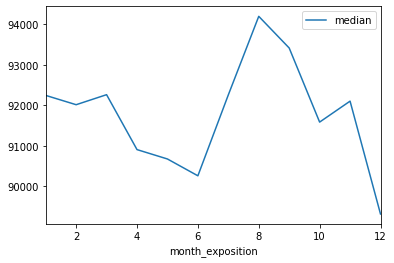

In [ ]:
pivot_table_month_exposition = filtered_data.pivot_table(index = 'month_exposition', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

In [ ]:
pivot_table_month_exposition.sort_values('median', ascending = False)

,mean,count,median
month_exposition,,,
8,94053.775980,1174,94198.0
9,94738.628067,1304,93416.5
3,93155.183812,1322,92264.5
7,92566.703375,1126,92259.5
1,92891.276432,908,92247.0
11,93156.540414,1497,92105.0
2,92115.838520,1703,92017.0
10,91864.000705,1418,91588.0
4,91755.911111,1035,90909.0


В размещении по месяцам прослеживается явная сезонность - низкий сезон с апреля по июнь, когда продаж меньше всего и цены ниже, затем резкий скачок в августе-сентябре, потом опять снижение к концу года и обратный скачок в январе.

Зависимость от дня недели

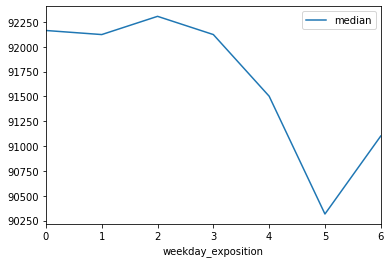

In [ ]:
pivot_table_day_exposition = filtered_data.pivot_table(index = 'weekday_exposition', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_day_exposition.columns = ['mean', 'count', 'median']
pivot_table_day_exposition.plot(y = 'median')

In [ ]:
pivot_table_day_exposition.sort_values('median', ascending = False)

,mean,count,median
weekday_exposition,,,
2,92661.583997,2387,92307.0
0,92812.999539,2168,92164.5
1,92717.243922,2550,92123.5
3,92696.501523,2626,92123.5
4,92988.211980,2571,91503.0
6,91270.041905,1050,91102.0
5,92073.284289,1203,90317.0


Выше стоимость квадрата для квартир, размещенных в начале рабочей недели, а к концу недели стоимость падает, ниже всего она в субботу. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Основные параметры, влияющие на цену, изучены. Приведены необходимые графики и значения корреляций. Здорово, что по каждому параметру приведен вывод о его влиянии на цену квартиры. 

Метод corr можно применять сразу ко всему датафрейму для получения матрицы корреляций. Также для визуализации данной матрицы корреляций можно использовать метод heatmap из библиотеки seaborn. Будет здорово, если ты сможешь это реализовать. 

</div>

<B> Данные по топ-10 населенных пунктов </B>

In [ ]:
locality_pivot_table = filtered_data.pivot_table(index = 'locality_name', values = 'price_per_sqm', aggfunc=['count', 'median'])
locality_pivot_table.columns = ['count', 'median']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)

In [ ]:
print(locality_pivot_table)

                 count    median
locality_name                   
Санкт-Петербург   9126  101851.0
Мурино             440   86309.5
Кудрово            330   95214.5
Шушары             324   75649.5
Всеволожск         276   65789.0
Колпино            240   73304.0
Парголово          237   90534.0
Пушкин             220   97545.0
Гатчина            205   66666.0
Выборг             164   56221.0


In [ ]:
locality_pivot_table[locality_pivot_table['median']==locality_pivot_table['median'].max()]

,count,median
locality_name,,
Санкт-Петербург,9126,101851.0


In [ ]:
locality_pivot_table[locality_pivot_table['median']==locality_pivot_table['median'].min()]

,count,median
locality_name,,
Выборг,164,56221.0


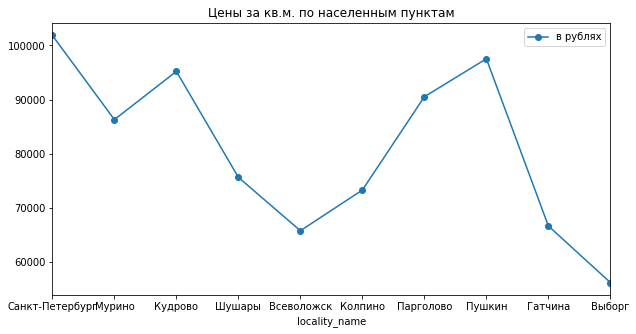

In [ ]:
locality_pivot_table.plot(y = 'median', marker='o', figsize=(10,5), title='Цены за кв.м. по населенным пунктам', label='в рублях')

Мы вычислили 10 населенных пунктов с самым большим количеством объявлений, самая высокая стоимость метра, ожидаемо, в Санкт-Петербурге, а самая низкая - в Выборге.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Результат по ценам в зависимости от местоположения квартир получен, можно привести график зависимости цены от местоположения.

</div>

<div class="alert alert-info">
+ еще один красивый график)
    </div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Только лучше использовать столбчатую диаграмму, а не линейный график. Все-таки мы работаем с категориальными данными. 

</div>

<B> Определение центральной зоны СПб</B>

In [ ]:
spb_data = filtered_data.query('locality_name == "Санкт-Петербург"')

In [ ]:
spb_data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

In [ ]:
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,floor_category,living_to_total,kitchen_to_total,weekday_exposition,month_exposition,year_exposition,total_area_bad,rooms_bad,ceiling_height_bad,cityCenters_nearest_km
4,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524,другой,0.714754,0.106557,6,2,2017,False,False,False,8.0
5,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525,другой,0.512626,0.214646,3,11,2017,False,False,False,NaN
9,16,4650000.0,39.0,2017-11-18,1,2.60,14.0,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,119230,другой,0.525641,0.194872,5,11,2017,False,False,False,15.0
10,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0,104838,другой,0.625806,0.180645,4,1,2017,False,False,False,14.0
12,13,3200000.0,31.6,2018-03-14,1,2.55,5.0,16.9,2,False,False,False,5.7,1,Санкт-Петербург,36064.0,9722.0,1.0,248.0,0.0,NaN,310.0,101265,другой,0.534810,0.180380,2,3,2018,False,False,False,NaN


In [ ]:
spb_data.dropna(subset=['cityCenters_nearest_km'], inplace=True)

In [ ]:
spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest_km'].astype('int')

In [ ]:
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7013 entries, 4 to 14547
Data columns (total 33 columns):
total_images              7013 non-null int64
last_price                7013 non-null float64
total_area                7013 non-null float64
first_day_exposition      7013 non-null datetime64[ns]
rooms                     7013 non-null int64
ceiling_height            7013 non-null float64
floors_total              7013 non-null float64
living_area               7013 non-null float64
floor                     7013 non-null int64
is_apartment              7013 non-null bool
studio                    7013 non-null bool
open_plan                 7013 non-null bool
kitchen_area              7013 non-null float64
balcony                   7013 non-null int64
locality_name             7013 non-null object
airports_nearest          7013 non-null float64
cityCenters_nearest       7006 non-null float64
parks_around3000          7006 non-null float64
parks_nearest             2961 non-null

In [ ]:
pivot_table_spb_data = spb_data.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_spb_data.columns = ['mean', 'count', 'median']
print(pivot_table_spb_data)

                                 mean  count    median
cityCenters_nearest_km                                
0                       110243.833333     18  101041.5
1                       111474.898551     69  105882.0
2                       105868.702899    138  101982.0
3                       105452.307692    130  101579.5
4                       105674.214035    285  101983.0
5                       105878.848571    350  100644.0
6                       109668.379630    216  103108.5
7                       112518.986577    149  104519.0
8                       106966.404545    220  102234.5
9                       105784.415966    238  100000.0
10                      107459.844828    290  102247.0
11                      107463.273118    465  102564.0
12                      106272.131922    614  100968.0
13                      107249.885813    578  101840.5
14                      108030.077535    503  102272.0
15                      106198.571661    614  102621.0
16        

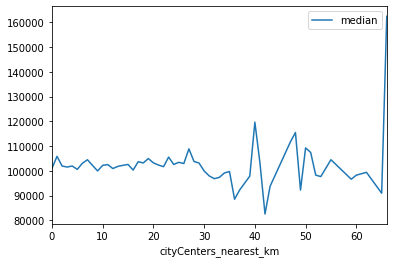

In [ ]:
pivot_table_spb_data.plot(y = 'median')

Цены за квадратный метр заметно снижаются для квартир, находящихся дальше примерно 8 км от центра, поэтому и примем эту величину за границу центра Санкт-Петербурга. Затем наблюдается скачок в ценах для расстояния в 27 км, но там находятся всего 2 объекта, поэтому нельзя судить о какой-то тенденции. Еще видно проседание цены в области около 3 км. Чуть подробнее изучим этот срез на предмет аномалий.

In [ ]:
spb_data.query('cityCenters_nearest_km == 3').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,floor_category,living_to_total,kitchen_to_total,weekday_exposition,month_exposition,year_exposition,total_area_bad,rooms_bad,ceiling_height_bad,cityCenters_nearest_km
138,14,3900000.0,42.2,2018-03-08,1,2.60,14.0,14.7,4,False,False,False,10.40000,0,Санкт-Петербург,23239.0,12102.0,1.0,1021.0,1.0,893.0,166.0,92417,другой,0.348341,0.246445,3,3,2018,False,False,False,3
178,19,7200000.0,70.6,2018-06-21,3,2.60,9.0,48.0,6,False,False,False,8.00000,0,Санкт-Петербург,15895.0,11223.0,1.0,681.0,0.0,NaN,63.0,101983,другой,0.679887,0.113314,3,6,2018,False,False,False,3
401,14,7200000.0,43.0,2017-10-31,1,2.80,8.0,9.0,2,False,False,False,23.00000,0,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0,167441,другой,0.209302,0.534884,1,10,2017,False,False,False,3
478,9,6300000.0,47.0,2018-09-05,1,2.80,3.0,23.0,1,False,False,False,12.00000,0,Санкт-Петербург,25599.0,6402.0,1.0,513.0,1.0,931.0,89.0,134042,первый,0.489362,0.255319,2,9,2018,False,False,False,3
568,11,5500000.0,44.0,2017-05-10,1,2.75,19.0,19.3,6,False,False,False,12.40000,2,Санкт-Петербург,42813.0,12689.0,1.0,343.0,0.0,NaN,41.0,125000,другой,0.438636,0.281818,2,5,2017,False,False,False,3
655,20,6150000.0,72.0,2017-06-06,3,2.55,9.0,44.0,8,False,False,False,13.48733,0,Санкт-Петербург,13315.0,14577.0,0.0,NaN,0.0,NaN,140.0,85416,другой,0.611111,0.187324,1,6,2017,False,False,False,3
962,12,5350000.0,50.0,2017-05-20,2,2.60,10.0,28.0,5,False,False,False,8.00000,2,Санкт-Петербург,29791.0,12652.0,0.0,NaN,1.0,815.0,73.0,107000,другой,0.560000,0.160000,5,5,2017,False,False,False,3
1098,3,3640000.0,39.0,2016-05-13,1,2.70,17.0,20.1,17,False,False,False,8.20000,1,Санкт-Петербург,33457.0,14480.0,0.0,NaN,1.0,269.0,150.0,93333,последний,0.515385,0.210256,4,5,2016,False,False,False,3
1117,7,6450000.0,62.0,2017-06-26,3,2.60,14.0,40.0,8,False,False,False,8.00000,1,Санкт-Петербург,15318.0,13859.0,1.0,320.0,0.0,NaN,85.0,104032,другой,0.645161,0.129032,0,6,2017,False,False,False,3
1262,11,4749000.0,42.0,2018-02-11,1,2.65,16.0,19.0,15,False,False,False,10.00000,0,Санкт-Петербург,10596.0,13971.0,0.0,NaN,0.0,NaN,303.0,113071,другой,0.452381,0.238095,6,2,2018,False,False,False,3


In [ ]:
spb_data.query('cityCenters_nearest_km == 3').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,living_to_total,kitchen_to_total,weekday_exposition,month_exposition,year_exposition,cityCenters_nearest_km
count,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,51.000000,130.000000,55.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0
mean,10.215385,5.771500e+06,53.531077,1.838462,2.666846,12.315385,29.889748,7.284615,9.870044,0.646154,27589.684615,12924.369231,0.500000,563.294118,0.553846,635.363636,142.330769,105452.307692,0.550124,0.192416,2.946154,5.884615,2017.238462,3.0
std,5.370007,3.091620e+06,19.707526,0.842696,0.140122,6.020681,13.253708,5.610393,4.337056,0.930629,12271.274584,4010.871527,0.717986,398.748256,0.768181,259.037418,106.987748,23947.743921,0.099010,0.066295,1.893733,3.436319,0.755382,0.0
min,0.000000,2.130000e+06,23.000000,1.000000,2.500000,2.000000,9.000000,1.000000,4.000000,0.000000,7026.000000,3691.000000,0.000000,19.000000,0.000000,63.000000,18.000000,49766.000000,0.209302,0.092308,0.000000,1.000000,2016.000000,3.0
25%,6.000000,3.812500e+06,39.275000,1.000000,2.550000,9.000000,18.310821,2.250000,7.050000,0.000000,16064.500000,11068.000000,0.000000,321.500000,0.000000,464.500000,51.250000,90696.000000,0.483061,0.150417,1.000000,3.000000,2017.000000,3.0
50%,10.000000,4.650000e+06,45.350000,2.000000,2.650000,11.000000,27.950000,6.000000,9.250000,0.000000,27358.500000,12983.500000,0.000000,504.000000,0.000000,645.000000,113.500000,101579.500000,0.564732,0.183242,3.000000,5.000000,2017.000000,3.0
75%,14.000000,6.897500e+06,63.525000,2.750000,2.750000,16.000000,37.900000,10.000000,11.000000,1.000000,37198.750000,15274.750000,1.000000,614.000000,1.000000,879.000000,198.000000,114914.250000,0.615343,0.236190,4.000000,9.000000,2018.000000,3.0
max,20.000000,2.280000e+07,112.100000,4.000000,3.000000,25.000000,69.700000,23.000000,37.500000,5.000000,52108.000000,25406.000000,3.000000,2137.000000,3.000000,1036.000000,423.000000,212093.000000,0.909589,0.534884,6.000000,12.000000,2019.000000,3.0


Каких-то аномалий не отмечено. Единственное, число комнат в этих квартирах выше, чем в среднем по датафрейму, в основном это трехкомнатные квартиры, у которых цена за квадрат ниже. Возможно, этим и объясняется данное снижение.

<I>Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.</I>

Как указано выше, я решила выделить в центральную зону область на расстоянии не больше 8 км от центра. В нее вошли 2366 квартир, рассмотрим эти данные подробнее.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Да, именно эту границу мы можем назвать границей центральной части области. 

</div>

In [ ]:
spb_center_data = spb_data.query('cityCenters_nearest_km <= 8')

In [ ]:
spb_center_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 4 to 14538
Data columns (total 33 columns):
total_images              1575 non-null int64
last_price                1575 non-null float64
total_area                1575 non-null float64
first_day_exposition      1575 non-null datetime64[ns]
rooms                     1575 non-null int64
ceiling_height            1575 non-null float64
floors_total              1575 non-null float64
living_area               1575 non-null float64
floor                     1575 non-null int64
is_apartment              1575 non-null bool
studio                    1575 non-null bool
open_plan                 1575 non-null bool
kitchen_area              1575 non-null float64
balcony                   1575 non-null int64
locality_name             1575 non-null object
airports_nearest          1575 non-null float64
cityCenters_nearest       1574 non-null float64
parks_around3000          1574 non-null float64
parks_nearest             645 non-null 

In [ ]:
spb_center_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,floor_category,living_to_total,kitchen_to_total,weekday_exposition,month_exposition,year_exposition,total_area_bad,rooms_bad,ceiling_height_bad,cityCenters_nearest_km
4,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524,другой,0.714754,0.106557,6,2,2017,False,False,False,8
61,32,9600000.0,90.0,2017-09-26,4,2.55,5.0,67.0,2,False,False,False,8.0,0,Санкт-Петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104.0,106666,другой,0.744444,0.088889,1,9,2017,False,False,False,4
63,14,4800000.0,35.0,2018-10-04,1,2.70,25.0,17.0,9,False,False,False,9.0,0,Санкт-Петербург,42499.0,9719.0,0.0,NaN,0.0,NaN,19.0,137142,другой,0.485714,0.257143,3,10,2018,False,False,False,5
70,8,3850000.0,42.0,2018-11-05,2,2.55,5.0,27.0,4,False,False,False,6.5,0,Санкт-Петербург,43019.0,8535.0,0.0,NaN,0.0,NaN,73.0,91666,другой,0.642857,0.154762,0,11,2018,False,False,False,8
94,14,7050000.0,66.0,2017-09-04,3,3.00,4.0,37.8,4,False,False,False,11.0,0,Санкт-Петербург,26235.0,4937.0,0.0,NaN,1.0,1013.0,98.0,106818,последний,0.572727,0.166667,0,9,2017,False,False,False,7


<B>Площади квартир в центре Санкт-Петербурга</B>

In [ ]:
spb_center_data['total_area'].describe()

count    1575.000000
mean       54.306952
std        19.074338
min        13.200000
25%        40.150000
50%        50.000000
75%        64.570000
max       114.000000
Name: total_area, dtype: float64

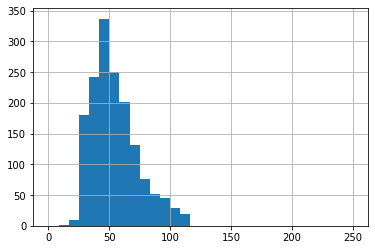

In [ ]:
spb_center_data['total_area'].hist(bins=30, range=(0, 250))

Чаще всего в центре встречаются квартиры площадью от 40 до 80 квадратов, что примерно совпадает с диапазоном распространенных площадей всего датафрейма. 

Цены квартир в центре Санкт-Петербурга

In [ ]:
spb_center_data['price_per_sqm'].describe()

count      1575.000000
mean     107400.567619
std       29339.525565
min       35384.000000
25%       89423.000000
50%      102000.000000
75%      118044.000000
max      379609.000000
Name: price_per_sqm, dtype: float64

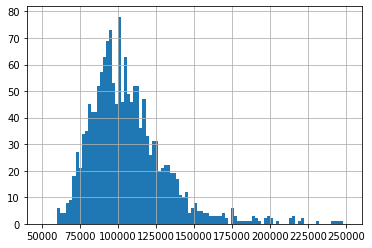

In [ ]:
spb_center_data['price_per_sqm'].hist(bins=100, range=(50000, 250000))

Средняя стоимость квадрата жилья в центре Санкт-Петербурга заметно выше. Самое популярное значение - 100000 рублей за метр, а медиана и среднее значение намного выше, чем в целом по датафрейму, примерно на 20-30%. 

Также рассмотрим общую стоимость объекта недвижимости. 

In [ ]:
spb_center_data['last_price'].describe()

count    1.575000e+03
mean     5.882013e+06
std      3.078690e+06
min      1.686000e+06
25%      3.900000e+06
50%      4.990000e+06
75%      6.800000e+06
max      3.500000e+07
Name: last_price, dtype: float64

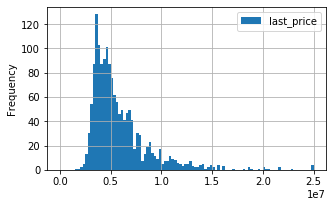

In [ ]:
spb_center_data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,25000000), figsize = (5,3))

In [ ]:
print('Средняя стоимость квартиры в целом по датафрейму:', data['last_price'].mean() / 1000000, 'млн', '\nА стоимость квартиры в центре Питера:', spb_center_data['last_price'].mean()/ 1000000, 'млн')

Средняя стоимость квартиры в целом по датафрейму: 6.492512339192985 млн 
А стоимость квартиры в центре Питера: 5.8820131219047616 млн


Стоимость квартиры в центре Петербурга тоже намного выше общей по датафрейму, средние значения отличаются в два раза.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Будет здорово, если ты автоматизируешь и данный блок визуализации.  

</div>

Число комнат

In [ ]:
spb_center_data['rooms'].describe()

count    1575.000000
mean        1.959365
std         0.881621
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

In [ ]:
pivot_table_spb_rooms = spb_center_data.pivot_table(index = 'rooms', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_spb_rooms.columns = ['mean', 'count', 'median']

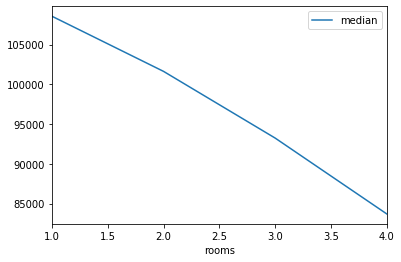

In [ ]:
pivot_table_spb_rooms.query('count > 50').plot(y = 'median')

В центре чаще продаются двух- и трехкомнатные квартиры, причем, их число практически одинаково, в то время как однушек почти в два раза меньше.

In [ ]:
spb_center_data['rooms'].value_counts()

1    570
2    567
3    376
4     57
5      4
6      1
Name: rooms, dtype: int64

Высота потолка

In [ ]:
spb_center_data['ceiling_height'].describe()

count    1575.000000
mean        2.666444
std         0.139054
min         2.450000
25%         2.550000
50%         2.650000
75%         2.750000
max         3.000000
Name: ceiling_height, dtype: float64

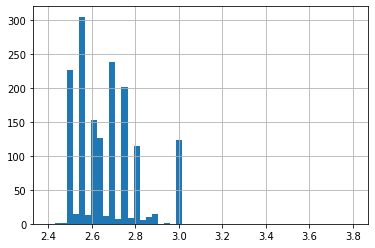

In [ ]:
spb_center_data['ceiling_height'].hist(bins=50, range=(2.4, 3.8))

Высота потолка в квартирах в центре выше, чем в целом в данных примерно на 20 см. Самое распространенное значение - 3 м, тогда как в таблице в общем больше всего потолков с высотой 2.6 - 2.7. Но также в центральных квартирах наблюдается второй пик значений - на высоте в 2.55 м, это как раз и является самой популярной высотой потолка для датасета в целом.

<I>Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?</I>

In [ ]:
spb_price_area_rooms_center = spb_center_data.loc[:,['price_per_sqm', 'floor', 'rooms', 'cityCenters_nearest']]
spb_price_area_rooms_center.head()

,price_per_sqm,floor,rooms,cityCenters_nearest
4,88524,7,3,15008.0
61,106666,2,4,2818.0
63,137142,9,1,9719.0
70,91666,4,2,8535.0
94,106818,4,3,4937.0


In [ ]:
spb_price_area_rooms_center.corr()

,price_per_sqm,floor,rooms,cityCenters_nearest
price_per_sqm,1.000000,0.141212,-0.176848,-0.381716
floor,0.141212,1.000000,-0.175772,0.230261
rooms,-0.176848,-0.175772,1.000000,-0.163477
cityCenters_nearest,-0.381716,0.230261,-0.163477,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f89925bd0>,
      dtype=object)

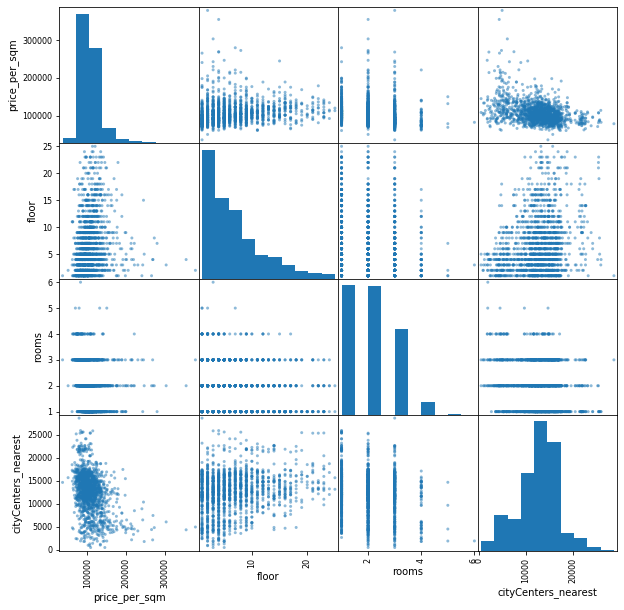

In [ ]:
pd.plotting.scatter_matrix(spb_price_area_rooms_center, figsize=(10, 10))

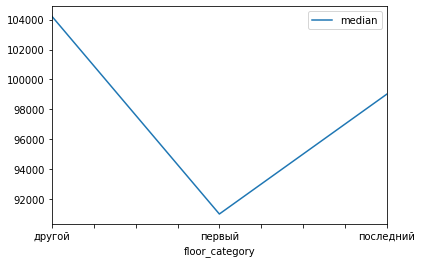

In [ ]:
spb_center_data_floor = spb_center_data.pivot_table(index = 'floor_category', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
spb_center_data_floor.columns = ['mean', 'count', 'median']
spb_center_data_floor.plot(y = 'median')

На общем графике сильной зависимости цены за квадрат от данных характеристик не видно, есть небольшая корреляция с этажом, которую лучше видно в отдельном графике для категорий этажа. Первый этаж сразу снижает стоимость квартиры,  тут корреляция схожа с общим датасетом.
Удаленность от центра практически не влияет, ведь мы и так выделили самую центральную зону.
На общей схеме видно, что размах стоимости квадратного метра сильнее всего для трехкомнатных квартир, для квартир с большим числом комнат цена за квадрат сразу снижается, однокомнатные квартиры в центре тоже ценятся меньше, чем их аналоги во всем датафрейме.

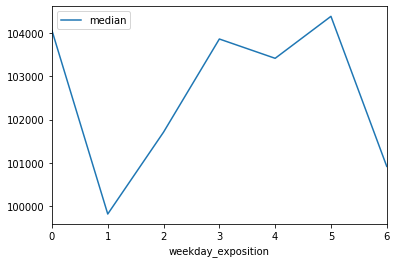

In [ ]:
spb_center_data_weekday = spb_center_data.pivot_table(index = 'weekday_exposition', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
spb_center_data_weekday.columns = ['mean', 'count', 'median']
spb_center_data_weekday.plot(y = 'median')

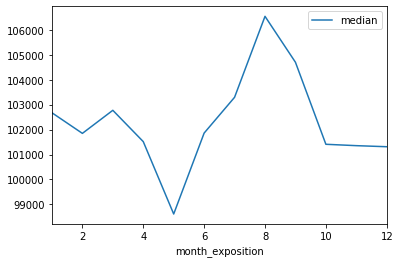

In [ ]:
spb_center_data_month = spb_center_data.pivot_table(index = 'month_exposition', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
spb_center_data_month.columns = ['mean', 'count', 'median']
spb_center_data_month.plot(y = 'median')

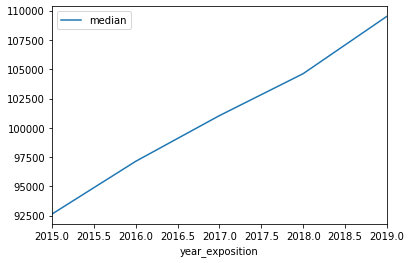

In [ ]:
spb_center_data_year = spb_center_data.pivot_table(index = 'year_exposition', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
spb_center_data_year.columns = ['mean', 'count', 'median']
spb_center_data_year.plot(y = 'median')

По дате размещения есть различия объявлений с квартирами в центре от общего объема данных:
1. Сезонность прослеживается не так четко, есть схожие снижения цены в апреле и декабре, но декабрьское не такое значительное, а после апрельского падения цены в мае взлетают. Пики также не совпадают: тут они в основном в марте и мае, а августовское повышение не так заметно
2. Нет тенденции в ценах по дням недели: пик приходится на субботу, а во вторник цены неожиданно падают.
3. А вот динамика роста цен от года к году прослеживается и здесь.

Возможно, данных просто не так много, и какие-то локальные пики повлияли и на средние тенденции

<B>Вывод:</B>
Продажи по квартирам в центре отличаются от остального массива - здесь на первый план выходят квартиры чуть большей площади и с бОльшим числом комнат. Однокомнатные квартиры составляют намного меньшую часть рынка в центре, чем за его пределами. Цены за квадрат выше для объектов меньшей площади, с увеличением площади снижается стоимость за кв.м.

Естественно, что и цены за квадратный метр и за весь объект становятся выше для тех объектов, которые ближе к центру города.

Как в центре, так и за пределами на стоимость квадратного метра влияет этажность - самые дешевые квартиры на первом этаже. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Будет здорово, если ты построишь параметры для центра и для остальной части города на одном рисунке. Так различия в данных будет легче обнаружить. 

Характерные для центра черты обнаружены. 

</div>

## Общий вывод

Для проведения исследования была проведена большая работа:
- подготовлены и обработаны данные
- найдены пропуски и аномалии, пропущенные данные заполнены либо удалены в зависимости от их количества и возможного влияния на результат проекта, аномалии удалены или объяснены
- изменены типы данных для удобства расчетов, исследований и наглядности отображения
- добавлены данные: стоимость квадратного метра, категория этажа, время размещения

В ходе исследования я изучила характеристики квартир рынка Санкт-Петербурга и их влияние на стоимость. 
Основная категория для сравнения - стоимость квадратного метра.

На нее влияют:
- близость к центру,
- общая площадь и количество комнат. Чем меньше площадь и меньше комнат, тем дороже стоит квадратный метр, для квартир бОльшей площади цена квадратного метра ниже. Для квартир за пределами центра стоимость квадратного метра чуть повышается с количеством комнат, возможно, из-за того, что такие квартиры расположены в элитных домах.
- этаж. Квартиры на первом этаже самые дешевые из-за проблем с безопасностью, освещаемостью, влажностью и т.д. Цены на квартиры на последнем этаже снижаются из-за возможных проблем с крышей.

Средняя цена квадратного метра - около 100,000 рублей, чуть выше в центре СПб, ниже, 50-80 тыс. руб. - за его пределами. Средняя стоимость квартиры - 6.5 млн рублей, основная масса стоит 3-7 млн руб, для центра Санкт-Петербурга значения выше примерно в два раза - средняя стоимость 13 млн рублей, диапазон от 5 до 15 млн руб.

Также отмечена сезонность рынка недвижимости - падения в апреле (возможно, в преддверии майских праздников и начала лета), всплески в марте, августе-сентябре и январе. Сезонность рынка центра СПб отличается от общих значений, зато тенденция к ежегодным повышением цен наблюдается для всех.

Не ясно, значит ли период размещения объявления реальную продажу квартиры, но видно, что средний период размещения - от 20 до 400 дней, основные значения составляют меньше 200 дней. Значит, большинство квартир продается за 4-7 месяцев. 

Следует отметить, что в данных замечено много пропусков и аномалий. В частности, большое число пропущенных и аномально больших и маленьких значений высоты потолка, пропуски при отметке балкона и апартаментов, а также близости парков, прудов.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод.     

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить и методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики. Рекомендую ресурс https://www.python-graph-gallery.com/. В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.

Ты проделала большую работу, молодец! Ты овладела важными на данном этапе обучения инструментами, а также довольно качественно их используешь. Критических замечаний немного. Однако их важно исправить. Также есть несколько желтых комментариев. Думаю, исправить и их тебе не составит труда. Жду твою работу :)

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Помарки исправлены, и теперь работа выполнена хорошо. Ты здорово поработала, молодец. Продолжай в том же духе. Успехов в дальнейших проектах :)

</div>
   

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- [x]  выполнено задание: "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод